In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\utilizador\Desktop\Listings.csv", encoding="ISO-8859-1", low_memory=False)

In [3]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [5]:
df['host_since'] = pd.to_datetime(df['host_since'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [6]:
df_paris = df.query("city == 'Paris'").loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [7]:
df_paris = df_paris[df_paris["host_since"].notna()]
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64657 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64657 non-null  object        
 2   city           64657 non-null  object        
 3   accommodates   64657 non-null  int64         
 4   price          64657 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [8]:
df_paris.describe()

,accommodates,price
count,64657.000000,64657.000000
mean,3.037877,113.104614
std,1.588382,214.479626
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [9]:
df_paris.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [10]:
df_paris.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [11]:
df_paris = df_paris[df_paris["price"].notna()]

In [12]:
paris_listings_neighbourhood = df_paris.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price", ascending=False)
paris_listings_neighbourhood 

,price
neighbourhood,
Elysee,210.536765
Louvre,175.379972
Passy,161.190476
Palais-Bourbon,156.891525
Luxembourg,155.638639
Bourse,149.496801
Hotel-de-Ville,144.515228
Temple,138.429300
Pantheon,122.696120


In [13]:
paris_listings_accomodations = (
    df_paris.query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values("price", ascending=False)
)
paris_listings_accomodations

,price
accommodates,
14,971.000000
13,842.500000
11,805.000000
16,800.000000
12,529.625000
10,500.857143
9,440.272727
7,411.538462
8,405.518519


In [14]:
paris_listings_over_time = (
    df_paris.set_index("host_since")
    .resample("Y")
    .agg({"neighbourhood":"count", "price":"mean"})
    .sort_values("price", ascending=False)
)
paris_listings_over_time

,neighbourhood,price
host_since,,
2009-12-31,106,159.641509
2020-12-31,3412,141.456038
2018-12-31,4294,138.209362
2019-12-31,5694,129.757113
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2016-12-31,8871,114.159847
2012-12-31,4592,111.578615
2017-12-31,4585,108.658888


<Figure size 720x432 with 0 Axes>

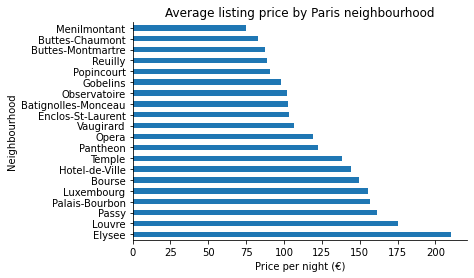

In [15]:
plt.figure(figsize=(10, 6))
paris_listings_neighbourhood.plot(kind='barh', title="Average listing price by Paris neighbourhood", legend=None)

plt.xlabel("Price per night (€)")
plt.ylabel("Neighbourhood")

sns.despine()
plt.show()

<Figure size 720x432 with 0 Axes>

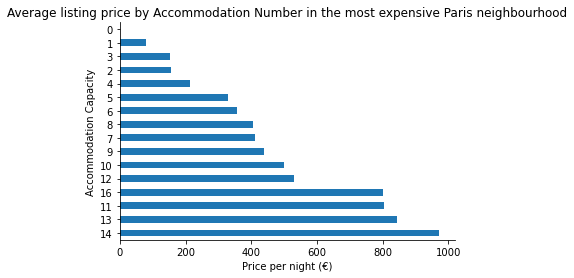

In [16]:
plt.figure(figsize=(10, 6))
paris_listings_accomodations.plot(kind='barh', title="Average listing price by Accommodation Number in the most expensive Paris neighbourhood", xlabel="Price per night (€)", ylabel="Accommodations", legend=None)

plt.xlabel("Price per night (€)")
plt.ylabel("Accommodation Capacity")

sns.despine()
plt.show()

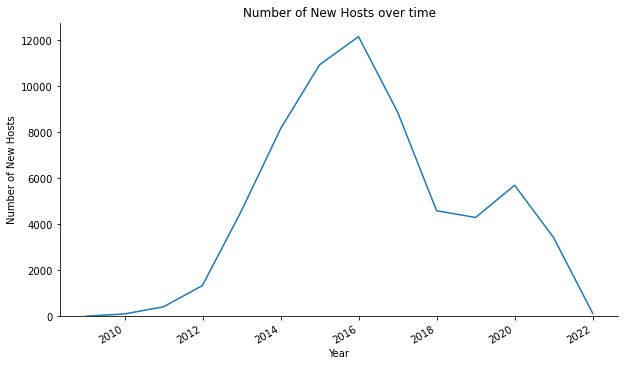

In [17]:
plt.figure(figsize=(10, 6))
paris_listings_over_time["neighbourhood"].plot(kind='line', title="Number of New Hosts over time", legend=None)

plt.xlabel("Year")
plt.ylabel("Number of New Hosts")

sns.despine()
plt.ylim(0,)
plt.show()

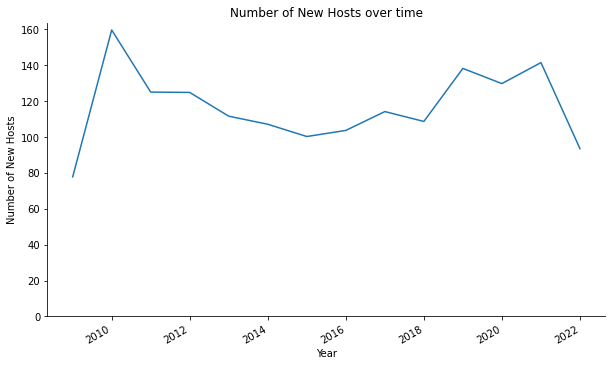

In [18]:
plt.figure(figsize=(10, 6))
paris_listings_over_time["price"].plot(kind='line', title="Number of New Hosts over time", legend=None)

plt.xlabel("Year")
plt.ylabel("Number of New Hosts")

sns.despine()
plt.ylim(0,)
plt.show()

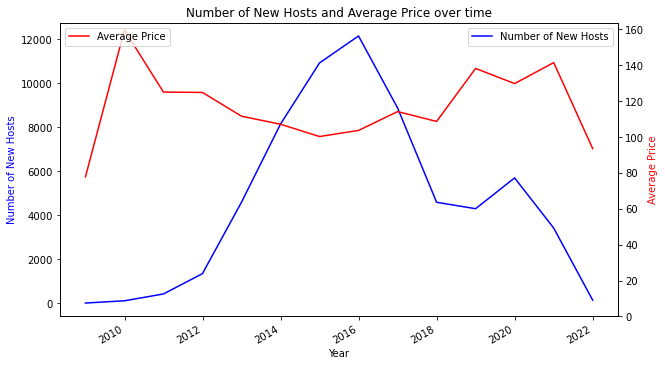

In [19]:
plt.figure(figsize=(10, 6))

ax1 = paris_listings_over_time["neighbourhood"].plot(kind='line', color='blue', legend=True, label='Number of New Hosts') 
plt.ylabel('Number of New Hosts', color='blue') 
plt.xlabel('Year') 
plt.title('Number of New Hosts and Average Price over time')

ax2 = ax1.twinx() 
paris_listings_over_time["price"].plot(kind='line', color='red', legend=True, label='Average Price', ax=ax2) 
plt.ylabel('Average Price', color='red')

plt.legend(loc='upper left') 
plt.ylim(0,)

plt.show()